# 라이브러리 및 데이터 불러오기

In [31]:
# matplotlib 한글 깨짐방지
# 아래코드 실행후 '런타임 다시시작' 후 모듈 불러오기
# 참고 블로그: https://teddylee777.github.io/colab/colab-korean
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') #matplotlib 한글 깨짐 방지

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# 데이터 불러오기
train=pd.read_csv("/content/drive/MyDrive/ESAA/영화 관객수/movies_train.csv")
test=pd.read_csv("/content/drive/MyDrive/ESAA/영화 관객수/movies_test.csv")
submission=pd.read_csv("/content/drive/MyDrive/ESAA/영화 관객수/submission.csv")

# 전처리

## 데이터 미리보기

In [4]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [5]:
train.tail()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.0,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.0,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525
599,베를린,CJ 엔터테인먼트,액션,2013-01-30,120,15세 관람가,류승완,NaN,0,363,5,7166532


In [6]:
test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [7]:
submission.head()

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0


## 데이터 요약

In [8]:
print(train.shape)
print(test.shape)
print(submission.shape)

(600, 12)
(243, 11)
(243, 2)


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           243 non-null    object 
 1   distributor     243 non-null    object 
 2   genre           243 non-null    object 
 3   release_time    243 non-null    object 
 4   time            243 non-null    int64  
 5   screening_rat   243 non-null    object 
 6   director        243 non-null    object 
 7   dir_prev_bfnum  107 non-null    float64
 8   dir_prev_num    243 non-null    int64  
 9   num_staff       243 non-null    int64  
 10  num_actor       243 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 21.0+ KB


## 데이터의 요약통계량 확인

In [11]:
pd.options.display.float_format = '{:.1f}'.format

In [12]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.0,270.0,600.0,600.0,600.0,600.0
mean,100.9,1050442.9,0.9,151.1,3.7,708181.8
std,18.1,1791408.3,1.2,165.7,2.4,1828005.9
min,45.0,1.0,0.0,0.0,0.0,1.0
25%,89.0,20380.0,0.0,17.0,2.0,1297.2
50%,100.0,478423.6,0.0,82.5,3.0,12591.0
75%,114.0,1286568.6,2.0,264.0,4.0,479886.8
max,180.0,17615314.0,5.0,869.0,25.0,14262766.0


In [13]:
test.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
count,243.0,107.0,243.0,243.0,243.0
mean,109.8,891669.5,0.9,159.3,3.5
std,124.0,1217341.5,1.2,163.0,2.1
min,40.0,34.0,0.0,0.0,0.0
25%,91.0,62502.0,0.0,18.0,2.0
50%,104.0,493120.0,0.0,105.0,3.0
75%,114.5,1080849.6,1.0,282.0,4.0
max,2015.0,6173099.5,6.0,776.0,16.0


## 결측치 확인 및 데이터 전처리

In [14]:
train.isna().sum()

,0
title,0
distributor,0
genre,0
release_time,0
time,0
screening_rat,0
director,0
dir_prev_bfnum,330
dir_prev_num,0
num_staff,0


In [15]:
test.isna().sum()

,0
title,0
distributor,0
genre,0
release_time,0
time,0
screening_rat,0
director,0
dir_prev_bfnum,136
dir_prev_num,0
num_staff,0


In [16]:
# 결측값의 특성 확인
train[train['dir_prev_bfnum'].isna()].head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778


In [17]:
test[test['dir_prev_bfnum'].isna()].head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
5,회오리 바람,모쿠슈라,드라마,2010-02-25,95,15세 관람가,장건재,NaN,0,156,2
6,경계도시 2,시네마 달,다큐멘터리,2010-03-18,104,15세 관람가,홍형숙,NaN,0,11,2
7,이웃집 남자,(주)루믹스미디어,드라마,2010-03-18,100,청소년 관람불가,장동홍,NaN,0,117,5


In [18]:
print(train[train['dir_prev_bfnum'].isna()]['dir_prev_num'].sum())
print(test[test['dir_prev_bfnum'].isna()]['dir_prev_num'].sum())

0
0


In [19]:
train['dir_prev_bfnum'].fillna(0, inplace=True)
test['dir_prev_bfnum'].fillna(0, inplace=True)

In [20]:
train['release_time']=pd.to_datetime(train['release_time'])
test['release_time']=pd.to_datetime(test['release_time'])

# 시각화

## 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 수에 따른 관객 수



**scatterplot**

시용 변수: dir_prev_num, box_off_num

x축: dir_prev_num

y축: box_off_num

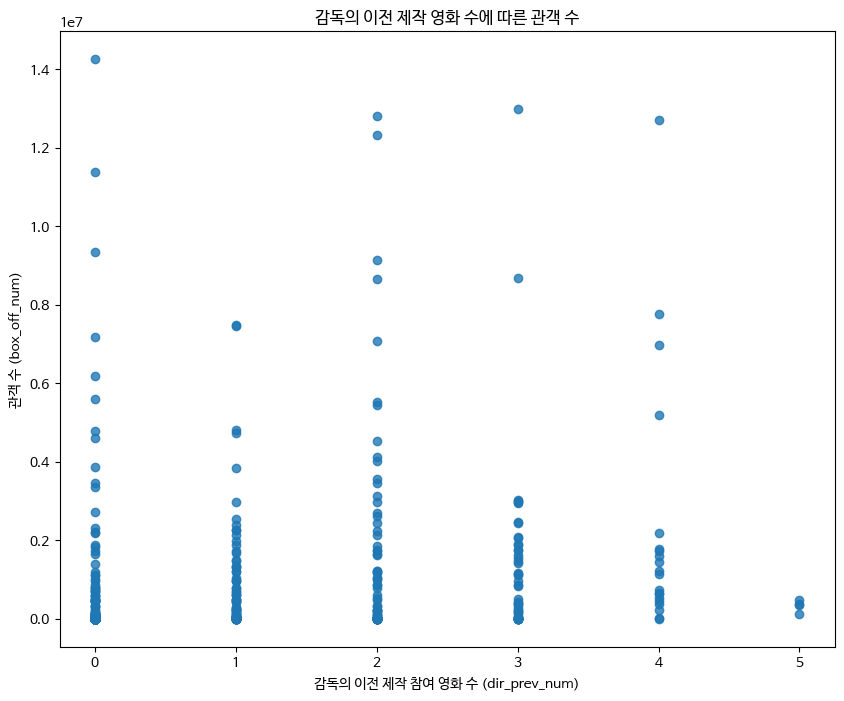

In [22]:
plt.figure(figsize = (10,8))
plt.scatter(train["dir_prev_num"], train["box_off_num"], alpha = 0.8)

plt.title("감독의 이전 제작 영화 수에 따른 관객 수", fontsize=12)
plt.xlabel("감독의 이전 제작 참여 영화 수 (dir_prev_num)")
plt.ylabel("관객 수 (box_off_num)")
plt.show()

**boxplot**

시용 변수: dir_prev_num, box_off_num

x축: dir_prev_num

y축: box_off_num

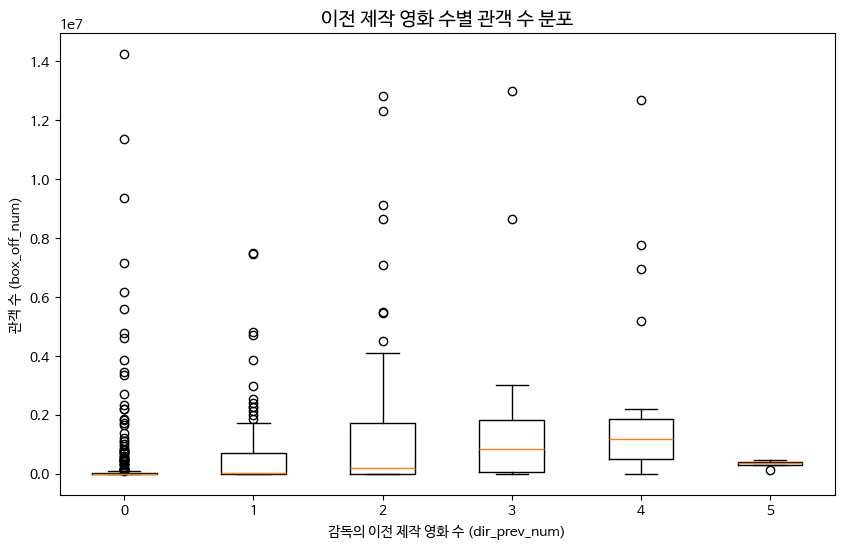

In [31]:
plt.figure(figsize=(10,6))
plt.boxplot(
    [train.loc[train["dir_prev_num"] == i, "box_off_num"] for i in sorted(train["dir_prev_num"].unique())],
    labels = sorted(train["dir_prev_num"].unique())
)

plt.title("이전 제작 영화 수별 관객 수 분포", fontsize=14)
plt.xlabel("감독의 이전 제작 영화 수 (dir_prev_num)")
plt.ylabel("관객 수 (box_off_num)")
plt.show()

**boxplot**

시용 변수: dir_prev_num, box_off_num

x축: dir_prev_num

y축: log_box_off_num

- box_off_num 변수 로그변환

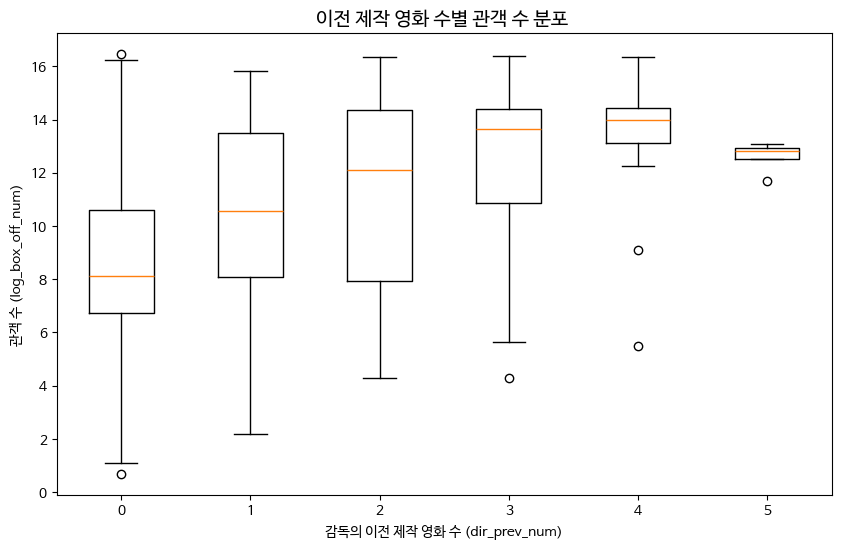

In [30]:
train["log_box_off_num"] = np.log1p(train["box_off_num"])

plt.figure(figsize=(10,6))
plt.boxplot(
    [train.loc[train["dir_prev_num"] == i, "log_box_off_num"] for i in sorted(train["dir_prev_num"].unique())],
    labels = sorted(train["dir_prev_num"].unique())
)

plt.title("이전 제작 영화 수별 관객 수 분포 ", fontsize=14)
plt.xlabel("감독의 이전 제작 영화 수 (dir_prev_num)")
plt.ylabel("관객 수 (log_box_off_num)")
plt.show()

## 개봉 연도별 전체 관객 수 추이

**histplot**

사용 변수: release_time, box_off_num

x축: release_year

- release_time에서 year 추출하여 x축으로 지정

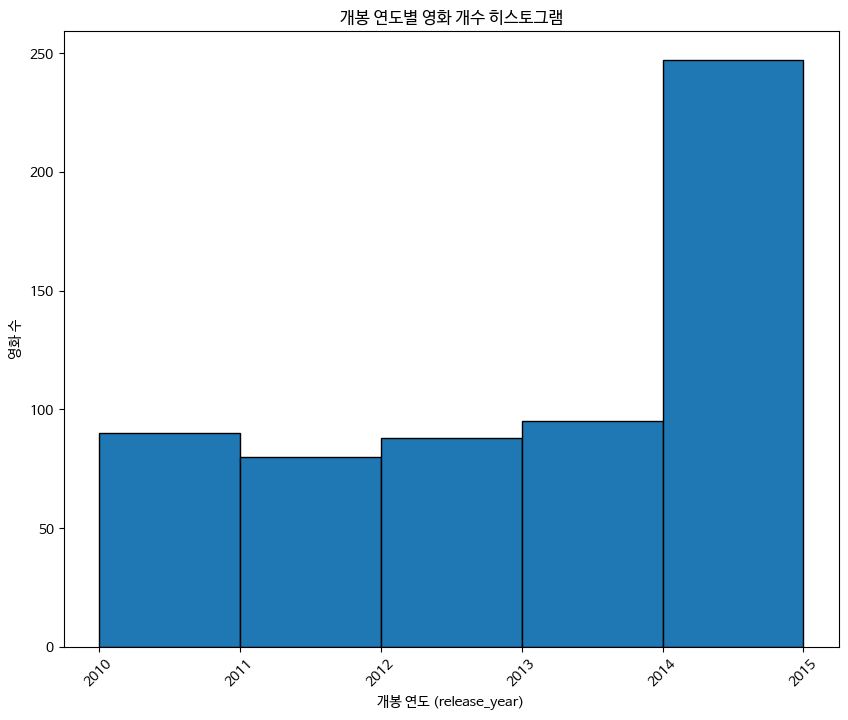

In [48]:
train['release_year']=train['release_time'].dt.year   #년도
train['release_month']=train['release_time'].dt.month   #월
train['release_day']=train['release_time'].dt.day     #일
train['release_weekday']=train['release_time'].dt.weekday   #요일

plt.figure(figsize=(10,8))
plt.hist(train['release_year'].dropna().astype(int),
         bins=range(int(train['release_year'].min()), int(train['release_year'].max())+1),
         edgecolor='black')

plt.title("개봉 연도별 영화 개수 히스토그램", fontsize=12)
plt.xlabel("개봉 연도 (release_year)")
plt.ylabel("영화 수")
plt.xticks(rotation=45)
plt.show()


**barplot**

사용 변수: release_time, box_off_num

x축: release_year

y축: box_off_num

- release_time에서 year추출하여 x축으로 지정
- 개봉 연도별 관객 수 합을 barplot으로 시각화

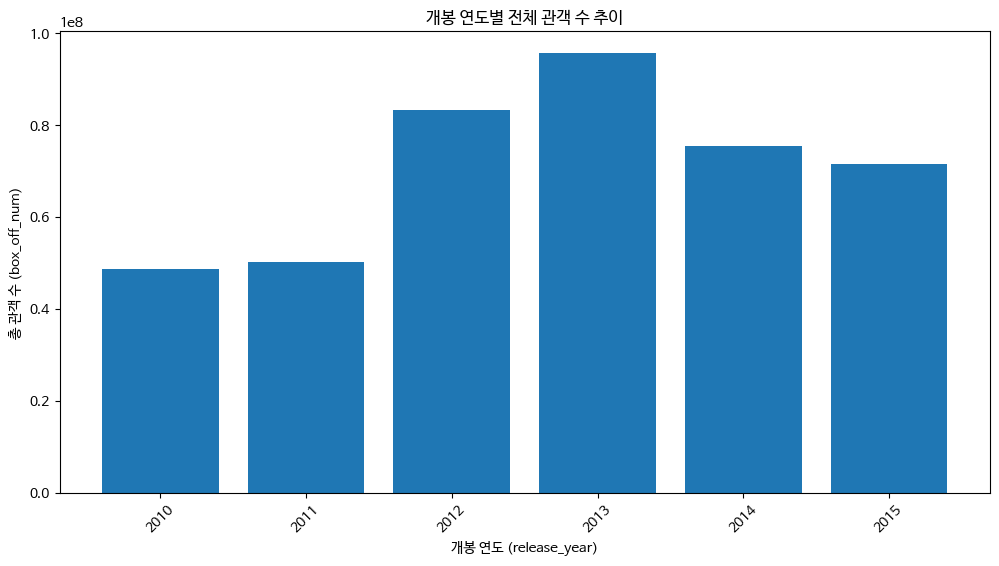

In [53]:
yearly_sum = train.groupby("release_year")["box_off_num"].sum()

plt.figure(figsize=(12,6))
plt.bar(yearly_sum.index, yearly_sum.values)

plt.title("개봉 연도별 전체 관객 수 추이", fontsize=12)
plt.xlabel("개봉 연도 (release_year)")
plt.ylabel("총 관객 수 (box_off_num)")
plt.xticks(rotation=45)
plt.show()

**line plot**

사용 변수: release_time, box_off_num

x축: release_year

y축: box_off_num

- release_time에서 year추출하여 x축으로 지정
- 개봉 연도별 관객 수의 평균을 lineplot으로 시각화

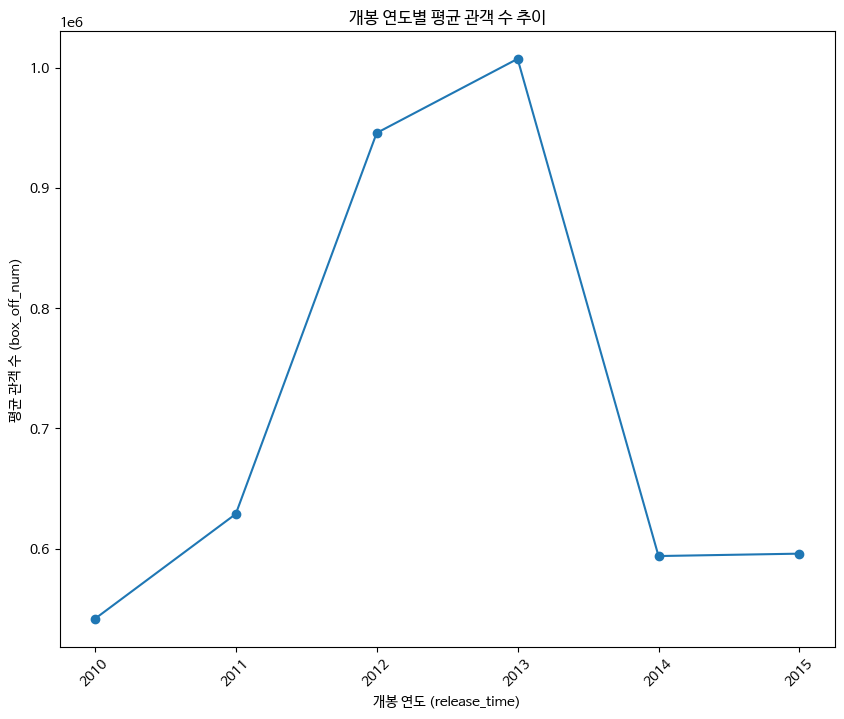

In [54]:
yearly_mean = train.groupby("release_year")["box_off_num"].mean()

plt.figure(figsize=(10,8))
plt.plot(yearly_mean.index, yearly_mean.values, marker="o")

plt.title("개봉 연도별 평균 관객 수 추이", fontsize=12)
plt.xlabel("개봉 연도 (release_time)")
plt.ylabel("평균 관객 수 (box_off_num)")
plt.xticks(rotation=45)
plt.show()


**boxplot + lineplot**

연도별 총 관객 수를 나타내는 barplot + 연도별 평균 관객 수를 나타내는 lineplot

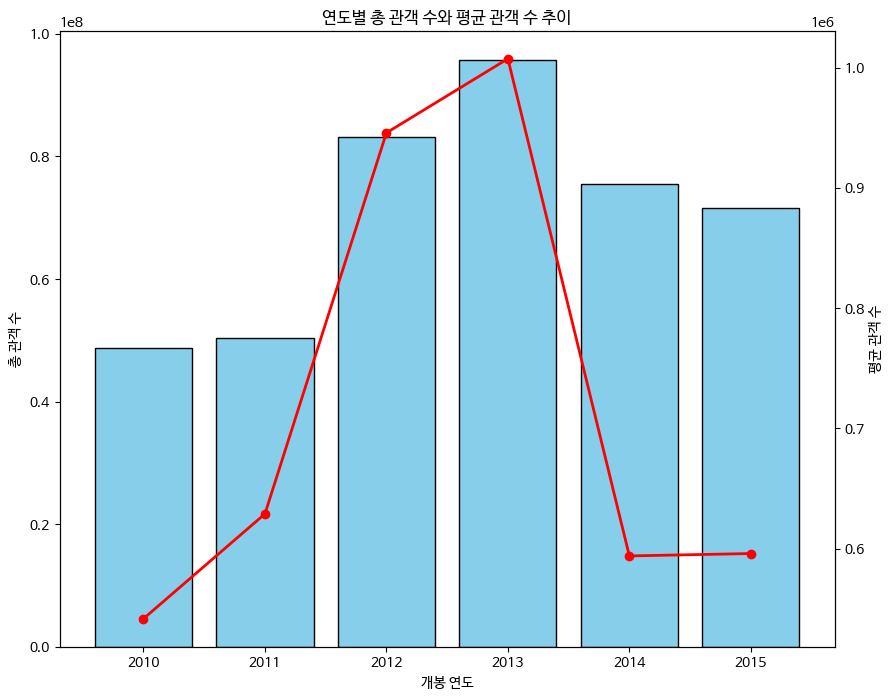

In [57]:
fig, ax1 = plt.subplots(figsize=(10,8))

ax1.bar(yearly_sum.index, yearly_sum.values, color='skyblue', edgecolor='black')
ax1.set_xlabel("개봉 연도")
ax1.set_ylabel("총 관객 수")
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.plot(yearly_mean.index, yearly_mean.values, color='red', marker='o', linewidth=2)
ax2.set_ylabel("평균 관객 수")
ax2.tick_params(axis='y')

plt.title("연도별 총 관객 수와 평균 관객 수 추이", fontsize=12)
plt.xticks(rotation=45)
plt.show()

## 장르별로 개봉 연도에 따른 관객 수

**lineplot**

사용 변수: release_year, genre, box_off_num

x축: release_year

y축: box_off_num

- lineplot 겹쳐서 그리기

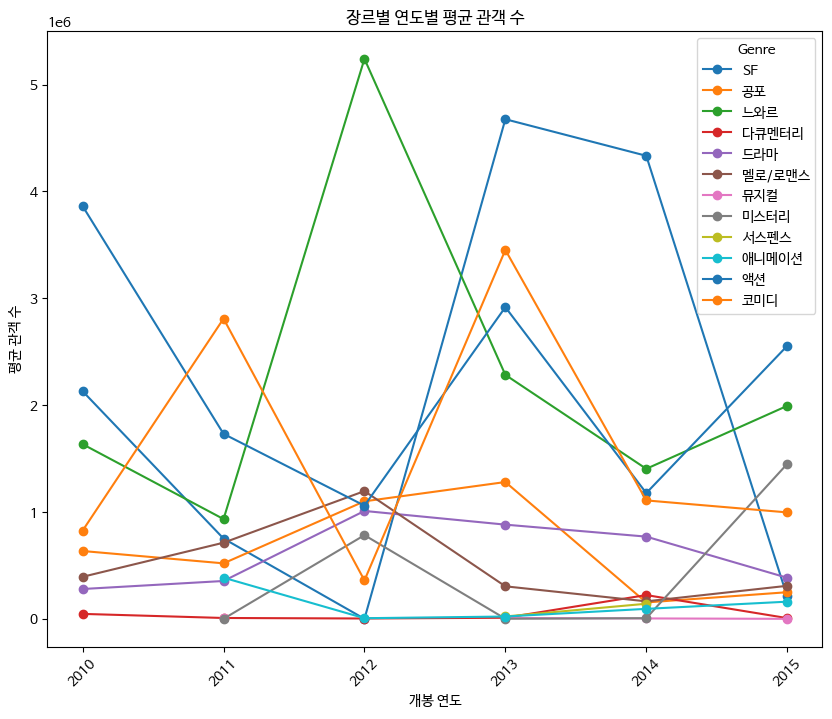

In [59]:
genre_yearly = train.groupby(['genre', 'release_year'])['box_off_num'].mean().reset_index()

pivot_df = genre_yearly.pivot(index='release_year', columns='genre', values='box_off_num')

plt.figure(figsize=(10,8))
ax = plt.gca()

pivot_df.plot(ax=ax, marker='o')

ax.set_title("장르별 연도별 평균 관객 수", fontsize=12)
ax.set_xlabel("개봉 연도")
ax.set_ylabel("평균 관객 수")
plt.xticks(rotation=45)
plt.legend(title='Genre')
plt.show()

**lineplot**

사용 변수: release_year, genre, box_off_num

x축: release_year

y축: box_off_num

- lineplot 따로 그리기

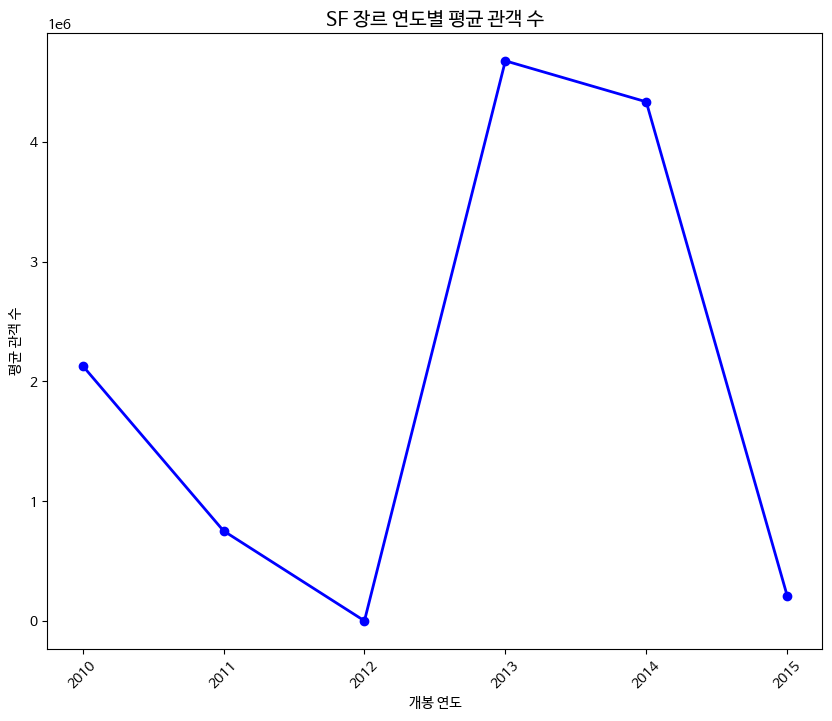

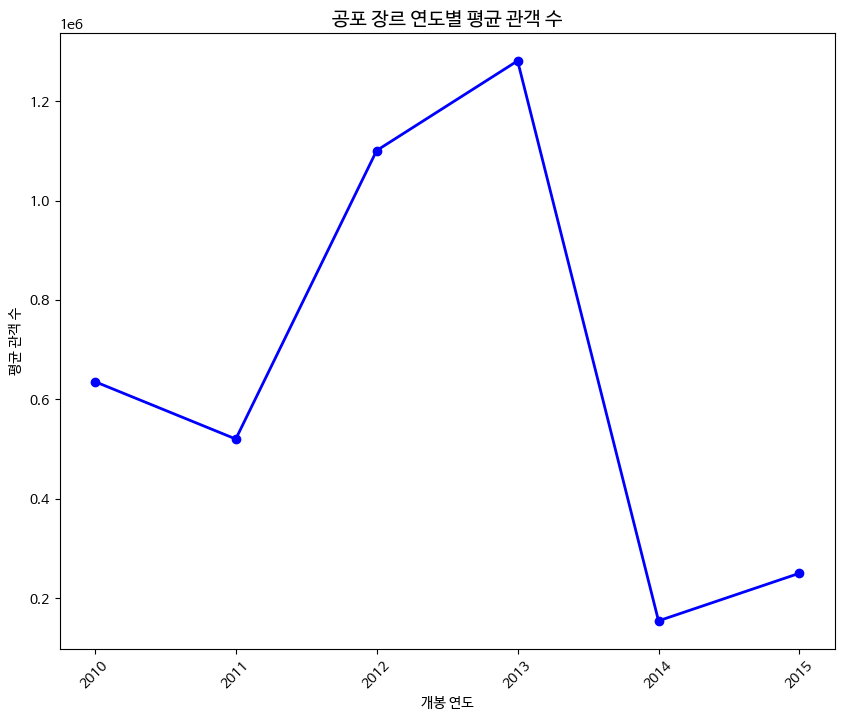

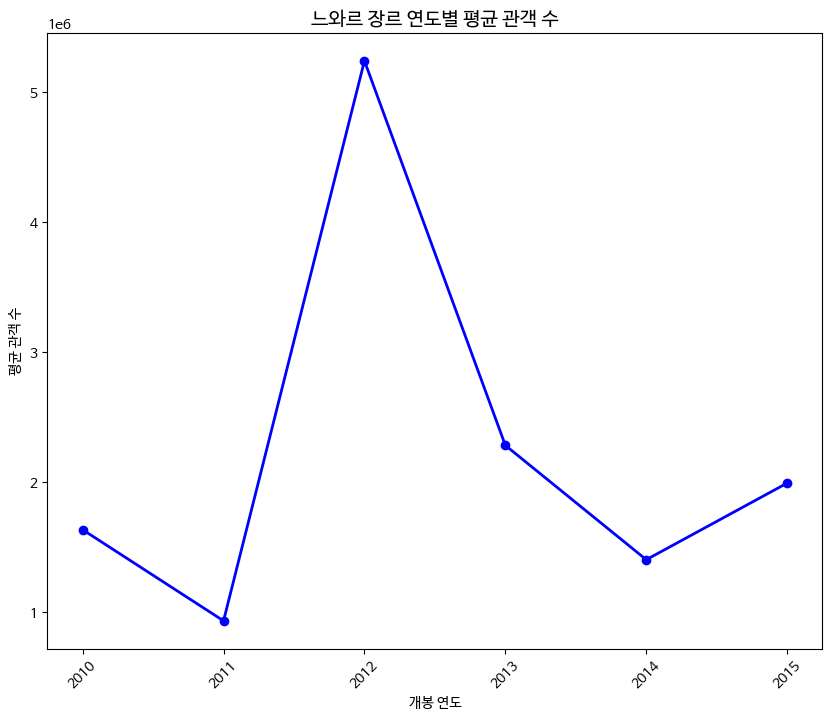

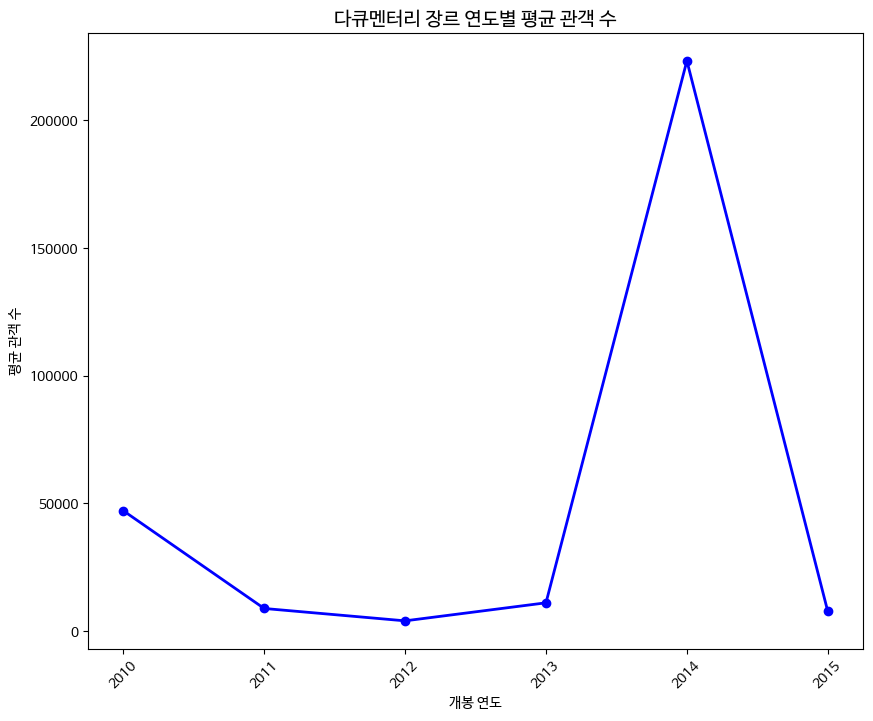

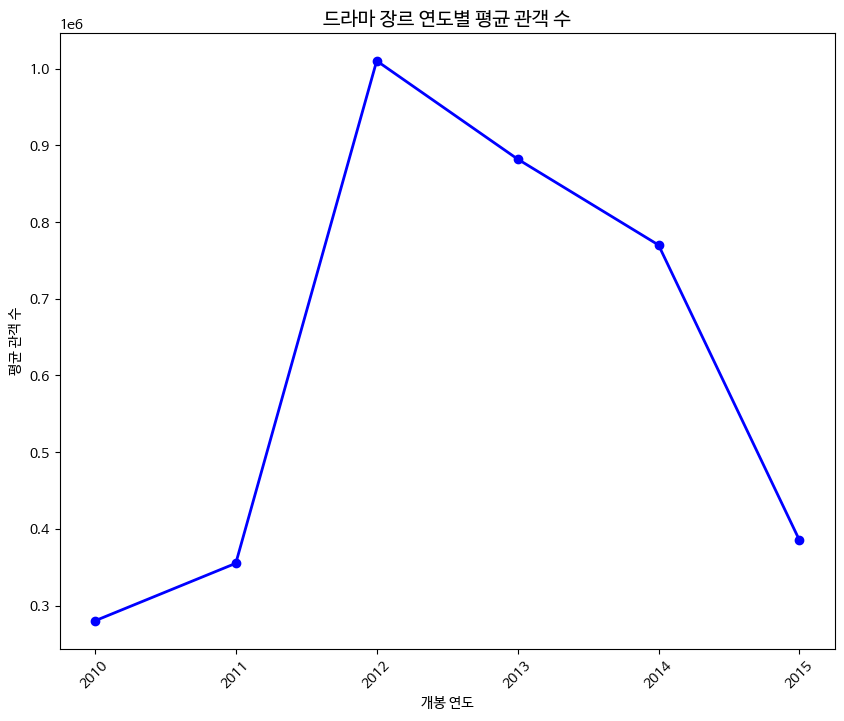

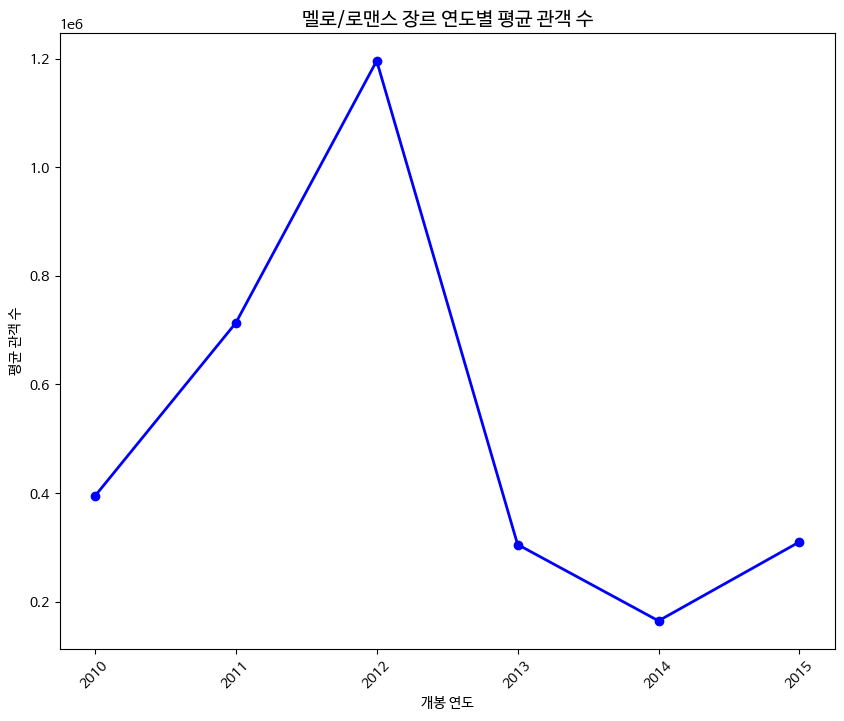

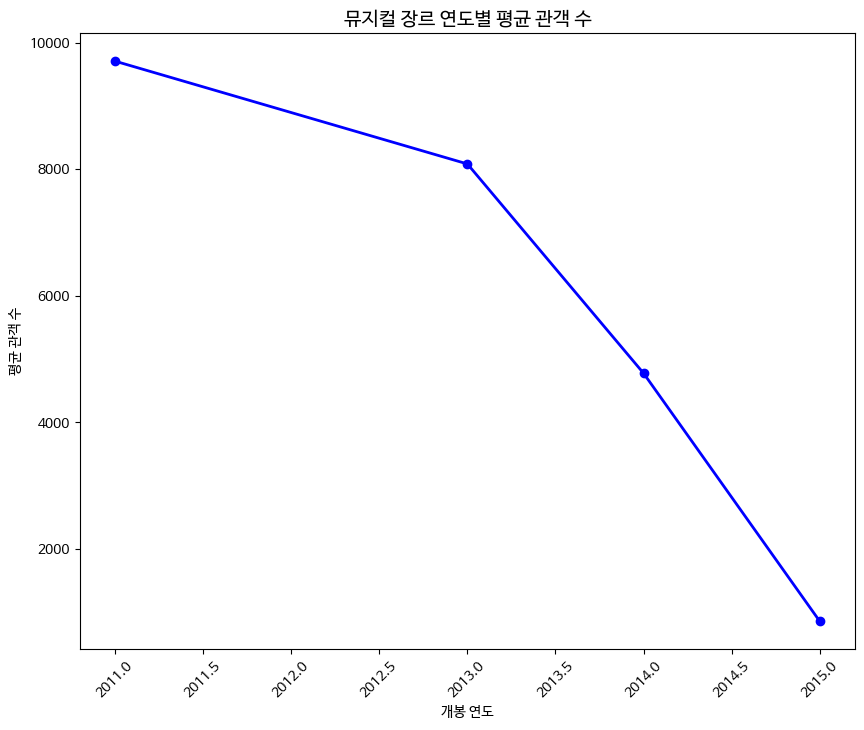

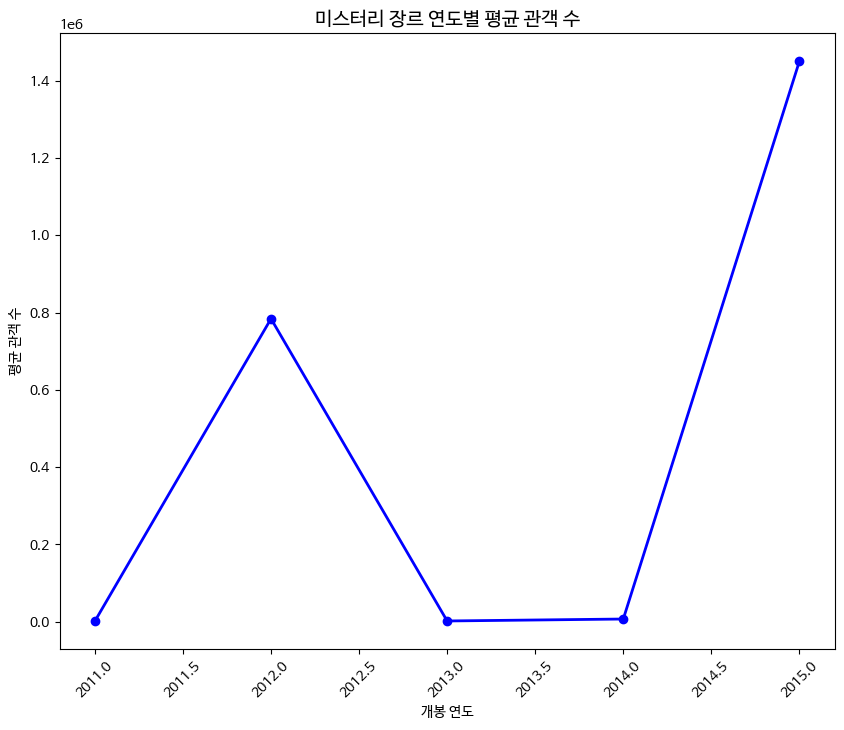

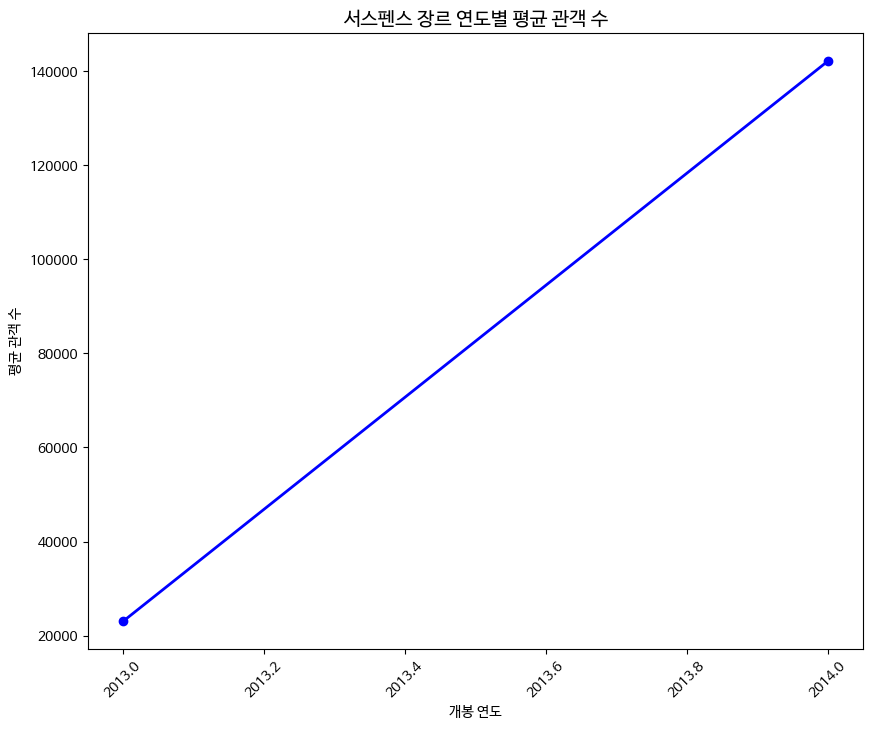

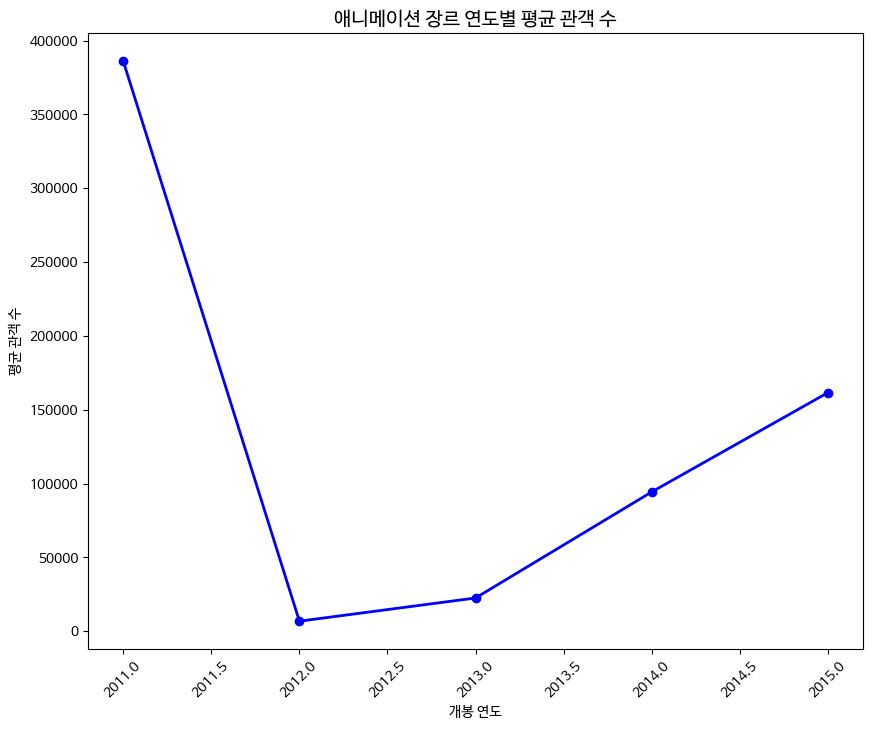

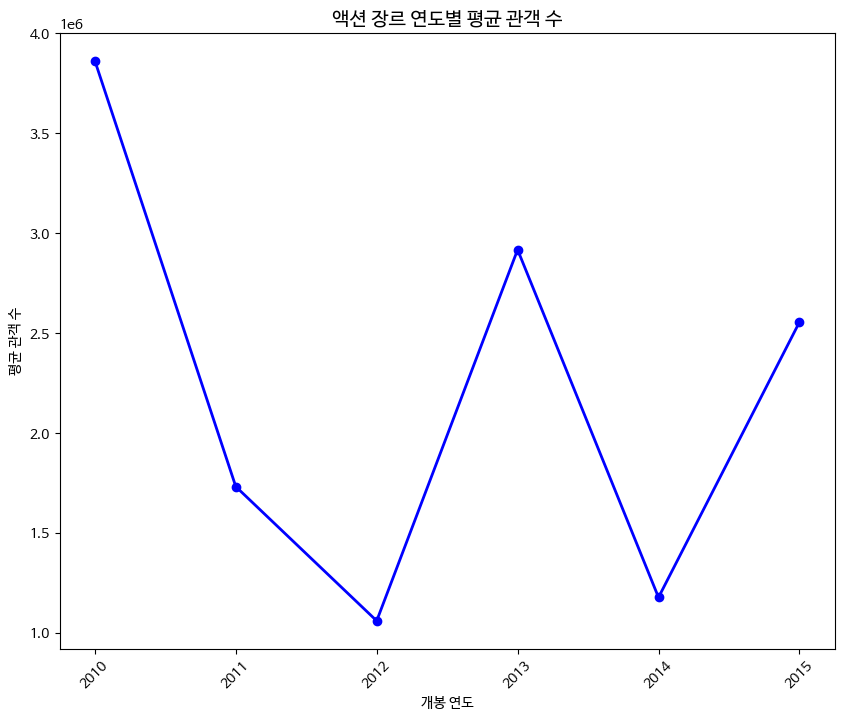

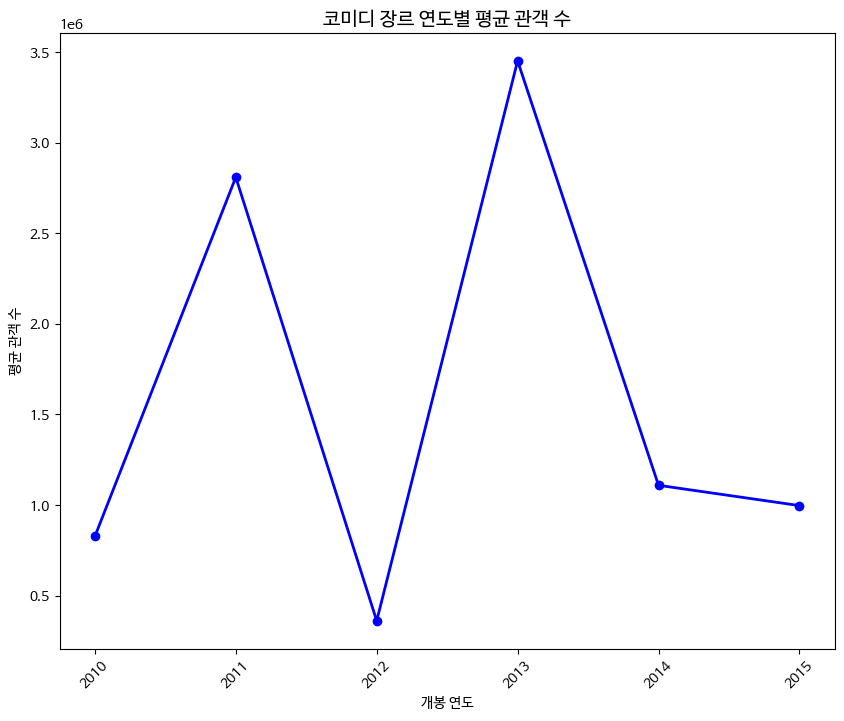

In [61]:
import matplotlib.pyplot as plt

genre_yearly = train.groupby(['genre', 'release_year'])['box_off_num'].mean().reset_index()

for g in genre_yearly['genre'].unique():
    data = genre_yearly[genre_yearly['genre'] == g]

    plt.figure(figsize=(10,8))
    plt.plot(data['release_year'], data['box_off_num'], marker='o', color='blue', linewidth=2)
    plt.title(f"{g} 장르 연도별 평균 관객 수", fontsize=14)
    plt.xlabel("개봉 연도")
    plt.ylabel("평균 관객 수")
    plt.xticks(rotation=45)
    plt.show()